In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [5]:
raw_data = pd.read_excel('https://raw.githubusercontent.com/smeng0428/BUS9430/main/loan.xlsx')

In [6]:
raw_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,0.1065,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,0.1527,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,0.1596,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,0.1349,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,0.1269,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [7]:
raw_data.shape

(39717, 111)

In [8]:
raw_data.info

<bound method DataFrame.info of             id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0      1077501    1296599       5000         5000           4975.0   
1      1077430    1314167       2500         2500           2500.0   
2      1077175    1313524       2400         2400           2400.0   
3      1076863    1277178      10000        10000          10000.0   
4      1075358    1311748       3000         3000           3000.0   
...        ...        ...        ...          ...              ...   
39712    92187      92174       2500         2500           1075.0   
39713    90665      90607       8500         8500            875.0   
39714    90395      90390       5000         5000           1325.0   
39715    90376      89243       5000         5000            650.0   
39716    87023      86999       7500         7500            800.0   

             term  int_rate  installment grade sub_grade  ...  \
0       36 months    0.1065       162.87     B        B2  ... 

In [10]:
## get the description for the features.

codebook = pd.read_excel('https://raw.githubusercontent.com/smeng0428/BUS9430/main/Data_Dictionary.xlsx', sheet_name='LoanStats')

In [13]:
## clean up the code book.the last two raws(115,116) are just footnotes.
codebook = codebook[:114].copy()

In [14]:
codebook

,LoanStatNew,Description
0,acc_now_delinq,The number of accounts on which the borrower i...
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan...
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by th...
...,...,...
109,total_rec_prncp,Principal received to date
110,total_rev_hi_lim,Total revolving high credit/credit limit
111,url,URL for the LC page with listing data.
112,verification_status,"Indicates if income was verified by LC, not ve..."


In [19]:
## check for missing data
pd.set_option('display.float_format', lambda x: '%.5f' % x)
missing_ratios = raw_data.isna().sum() / raw_data.shape[0]
missing_ratios.sort_values(ascending = False)


total_il_high_credit_limit   1.00000
mo_sin_old_rev_tl_op         1.00000
bc_util                      1.00000
bc_open_to_buy               1.00000
avg_cur_bal                  1.00000
                               ...  
pub_rec                      0.00000
open_acc                     0.00000
inq_last_6mths               0.00000
earliest_cr_line             0.00000
id                           0.00000
Length: 111, dtype: float64

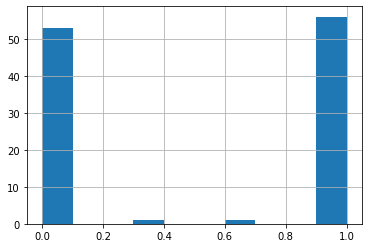

In [17]:
## significant part of the feature have nearly all missing values. These features does not provide much info.
## small portion of features have 30-70% missing values.
missing_ratios.hist()

In [25]:
##set missing ratio 0.8 as a threshold
missing_low = missing_ratios[missing_ratios<0.8]
len(missing_low.index)
## this method reduce the features to 55

55

In [38]:
pd.set_option('display.max_columns', raw_reduced.shape[1])
raw_reduced = raw_data[missing_low.index]
raw_reduced.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.00000,36 months,0.10650,162.87000,B,B2,NaN,10+ years,RENT,24000.00000,Verified,2011-12-01,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65000,0,1985-01-01,1,nan,3,0,13648,0.83700,9,f,0.00000,0.00000,5863.15519,5833.84000,5000.00000,863.16000,0.00000,0.00000,0.00000,2015-01-01,171.62000,2016-05-01,0.00000,1,INDIVIDUAL,0,0.00000,0,0.00000,0.00000
1,1077430,1314167,2500,2500,2500.00000,60 months,0.15270,59.83000,C,C4,Ryder,< 1 year,RENT,30000.00000,Source Verified,2011-12-01,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00000,0,1999-04-01,5,nan,3,0,1687,0.09400,4,f,0.00000,0.00000,1008.71000,1008.71000,456.46000,435.17000,0.00000,117.08000,1.11000,2013-04-01,119.66000,2013-09-01,0.00000,1,INDIVIDUAL,0,0.00000,0,0.00000,0.00000
2,1077175,1313524,2400,2400,2400.00000,36 months,0.15960,84.33000,C,C5,NaN,10+ years,RENT,12252.00000,Not Verified,2011-12-01,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72000,0,2001-11-01,2,nan,2,0,2956,0.98500,10,f,0.00000,0.00000,3005.66684,3005.67000,2400.00000,605.67000,0.00000,0.00000,0.00000,2014-06-01,649.91000,2016-05-01,0.00000,1,INDIVIDUAL,0,0.00000,0,0.00000,0.00000
3,1076863,1277178,10000,10000,10000.00000,36 months,0.13490,339.31000,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.00000,Source Verified,2011-12-01,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00000,0,1996-02-01,1,35.00000,10,0,5598,0.21000,37,f,0.00000,0.00000,12231.89000,12231.89000,10000.00000,2214.92000,16.97000,0.00000,0.00000,2015-01-01,357.48000,2016-04-01,0.00000,1,INDIVIDUAL,0,0.00000,0,0.00000,0.00000
4,1075358,1311748,3000,3000,3000.00000,60 months,0.12690,67.79000,B,B5,University Medical Group,1 year,RENT,80000.00000,Source Verified,2011-12-01,Current,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94000,0,1996-01-01,0,38.00000,15,0,27783,0.53900,38,f,524.06000,524.06000,3513.33000,3513.33000,2475.94000,1037.39000,0.00000,0.00000,0.00000,2016-05-01,67.79000,2016-05-01,0.00000,1,INDIVIDUAL,0,0.00000,0,0.00000,0.00000


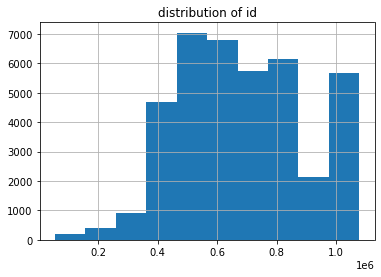

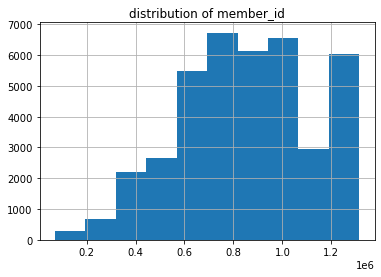

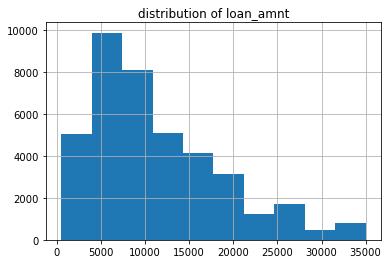

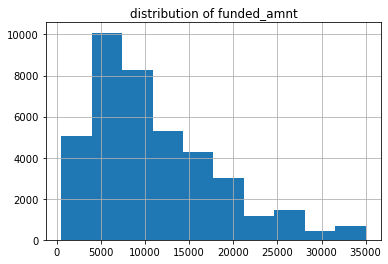

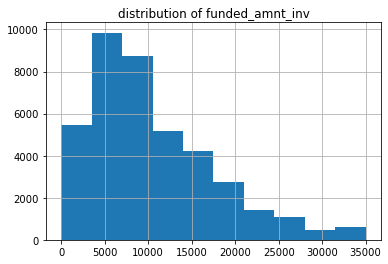

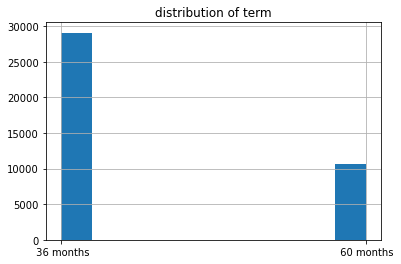

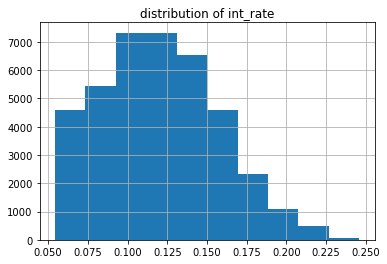

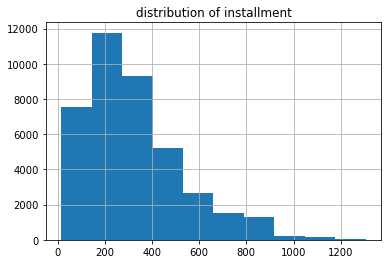

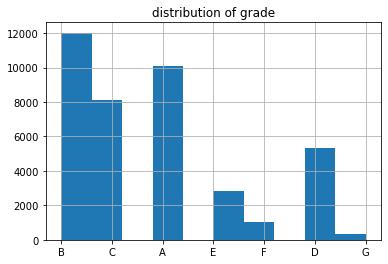

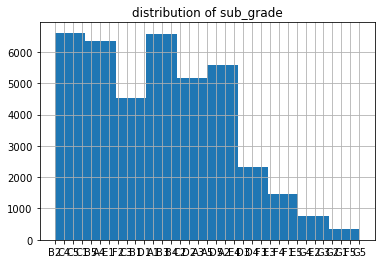

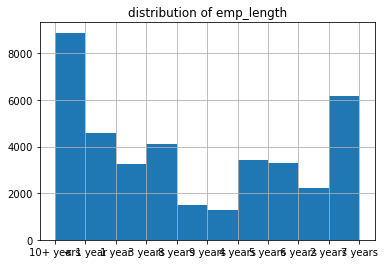

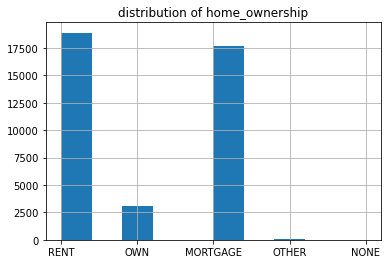

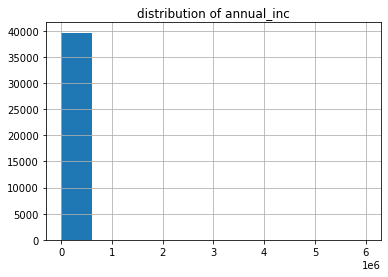

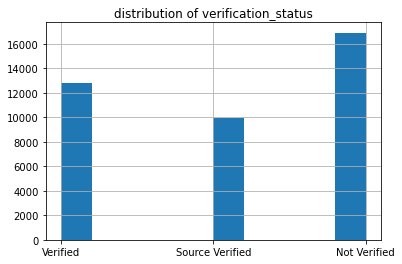

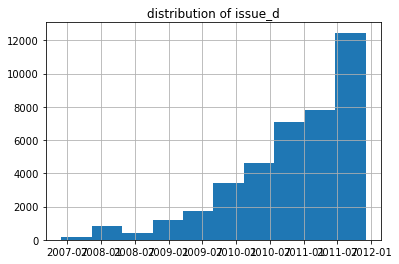

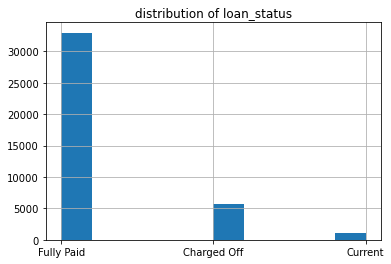

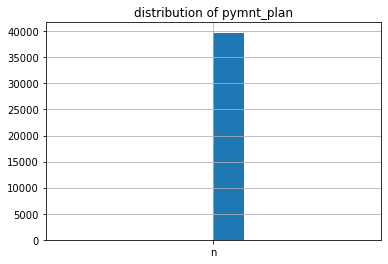

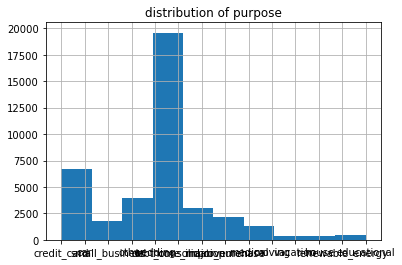

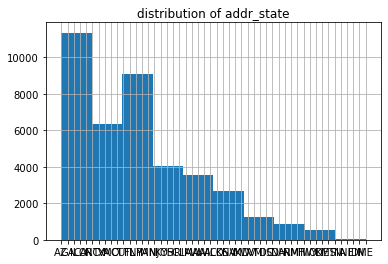

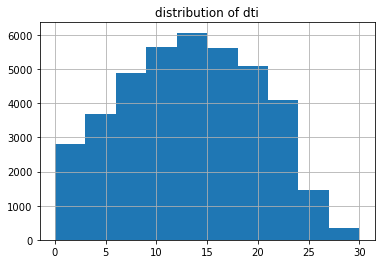

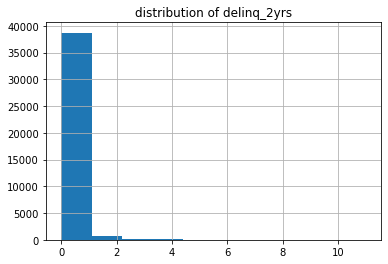

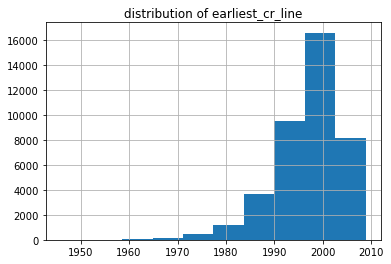

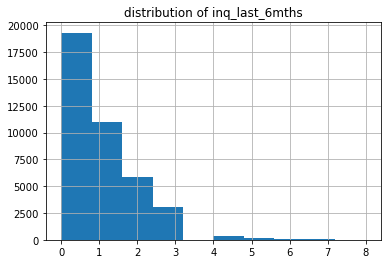

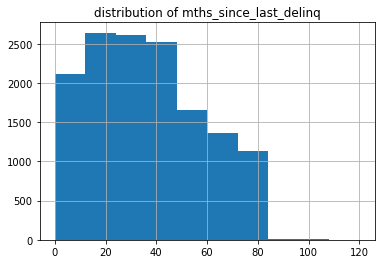

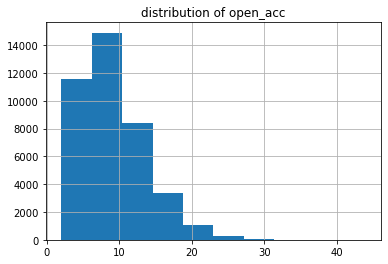

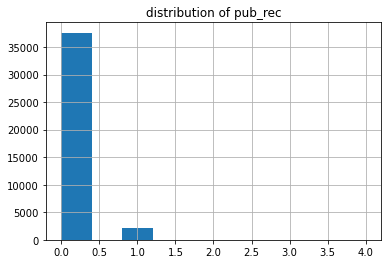

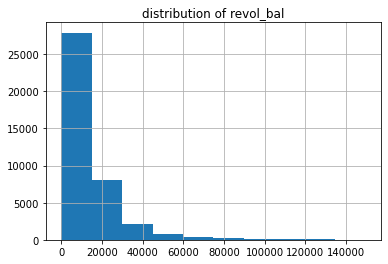

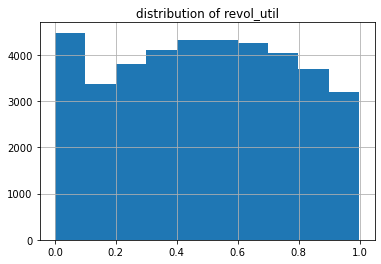

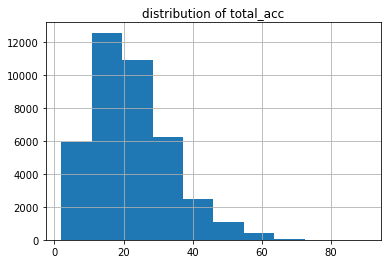

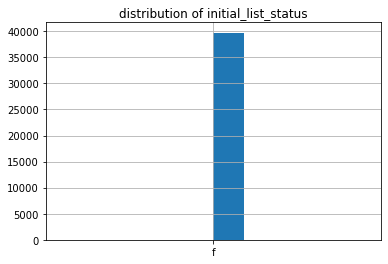

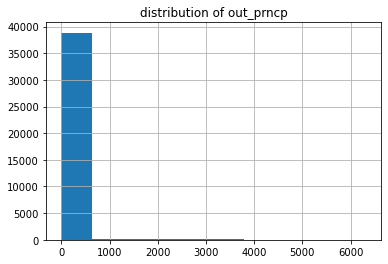

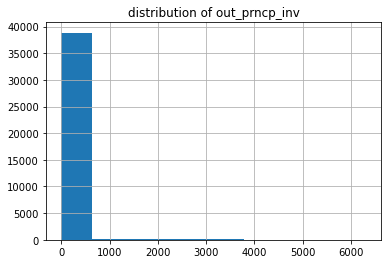

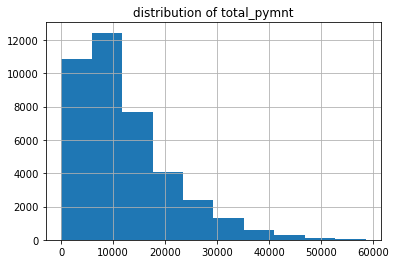

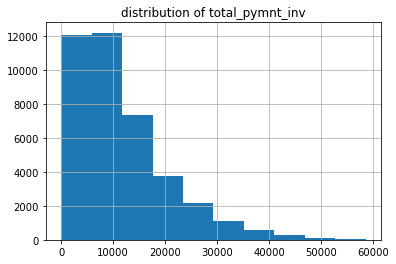

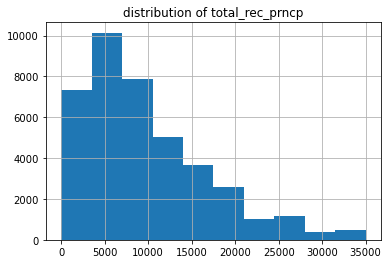

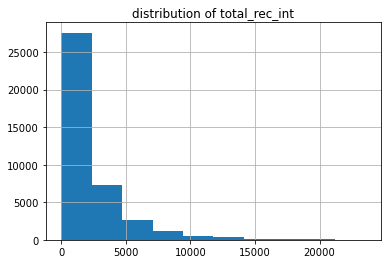

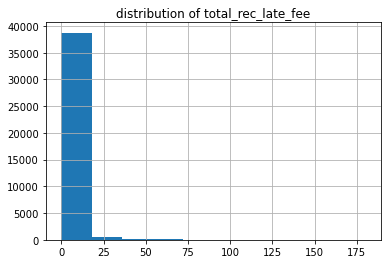

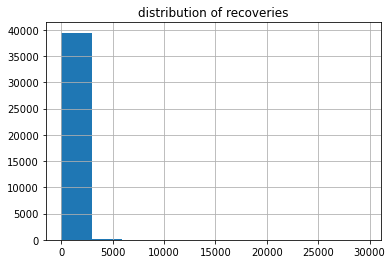

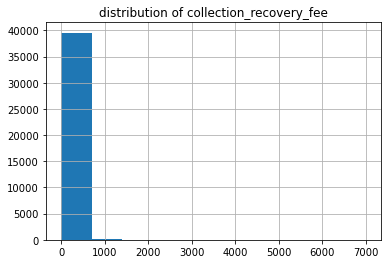

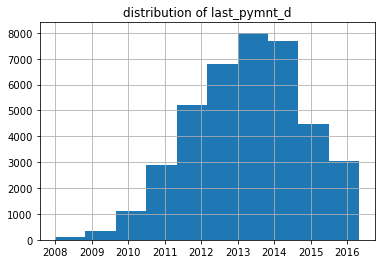

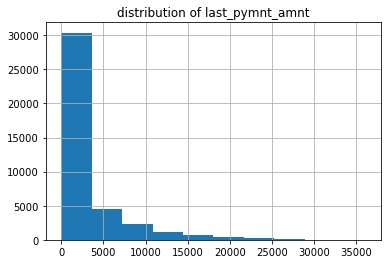

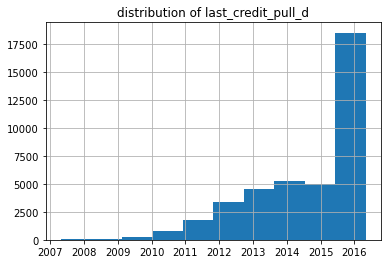

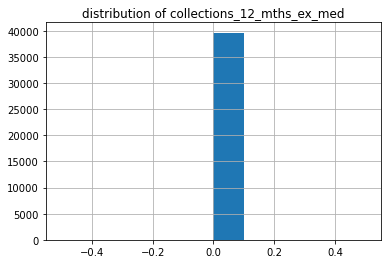

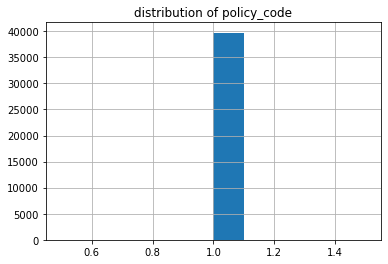

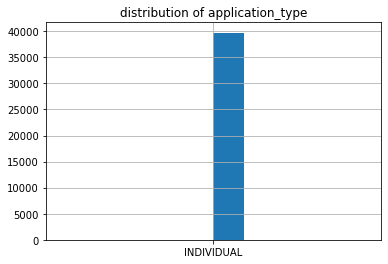

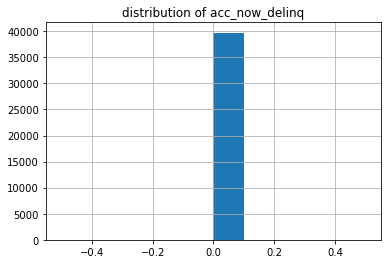

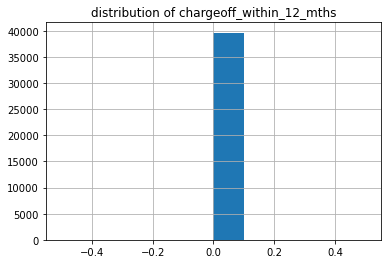

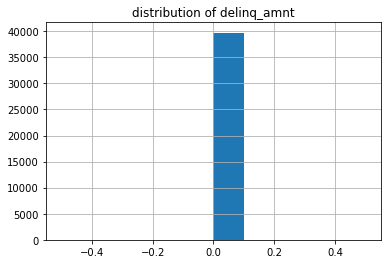

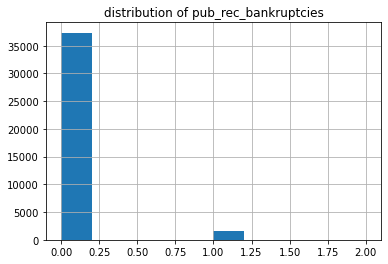

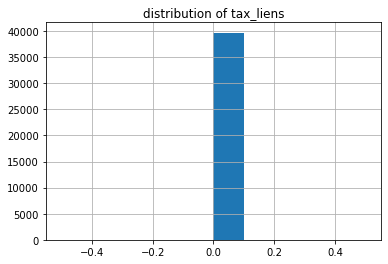

In [39]:
## hist plot for all the columns
for i in [w for w in raw_reduced.columns if w not in ['emp_title','url','desc','zip_code','title']]:
        raw_reduced[i].hist()
        plt.title('distribution of '+i)
        plt.show()
